<a href="https://colab.research.google.com/github/alifele/Bioinformatics-OpticalCNNwithFourierOptics/blob/master/pinhole_and_bessel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
from scipy import signal
from scipy import misc
from sklearn.datasets import load_sample_image

In [2]:
def mask_fourier(a, window_size):
  x = np.linspace(-10,10,100*window_size)
  X,Y = np.meshgrid(x,x)
  J = 2 * np.pi * a**2 * jv(1,a*(np.sqrt(X**2+ Y**2)))/(a*(np.sqrt(X**2+ Y**2)) + 0.0001) 
  return J,X,Y

In [4]:
def cylinder(a):
  window_size = 10
  x = np.linspace(-10,10,100*window_size)
  X,Y = np.meshgrid(x,x)
  cyl = np.zeros(X.shape)
  cyl[(X**2+ Y**2)<a**2] = 1
  return cyl,X,Y

Text(0.5, 0, '$y$')

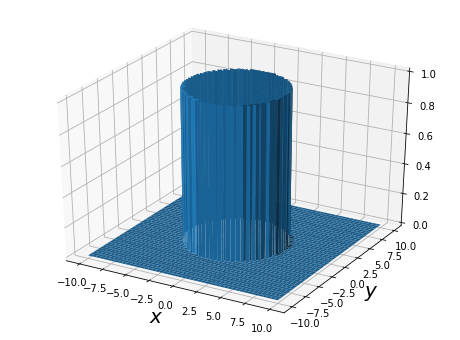

In [10]:
from mpl_toolkits.mplot3d import Axes3D
cyl,X,Y = cylinder(5)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, cyl)
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)

#ax.set_zlim([0,1])

Text(0.5, 0, '$F(K_{\\alpha})$')

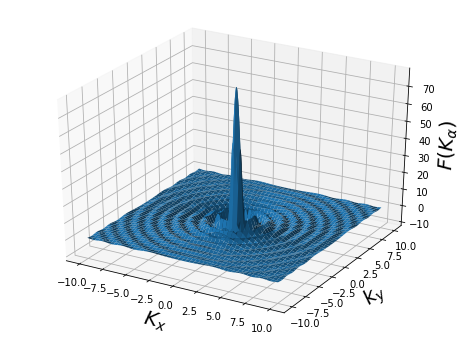

In [20]:
from mpl_toolkits.mplot3d import Axes3D
J,X,Y = mask_fourier(5,10)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, J)
ax.set_xlabel("$K_{x}$", fontsize=20, labelpad=7)
ax.set_ylabel("$k_{y}$",fontsize=20, labelpad=7)
ax.set_zlabel(r"$F(K_{\alpha})$",fontsize=20, labelpad=5)